# Data Wrangling

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.linear_model import LinearRegression
import seaborn as sns


In [32]:
data=pd.read_csv("bitcoin_price_Training - Training.csv")
data

,Date,Open,High,Low,Close,Volume,Market Cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1551,"May 02, 2013",116.38,125.60,92.28,105.21,-,"1,292,190,000"
1552,"May 01, 2013",139.00,139.89,107.72,116.99,-,"1,542,820,000"
1553,"Apr 30, 2013",144.00,146.93,134.05,139.00,-,"1,597,780,000"
1554,"Apr 29, 2013",134.44,147.49,134.00,144.54,-,"1,491,160,000"


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        1556 non-null   object 
 1   Open        1556 non-null   float64
 2   High        1556 non-null   float64
 3   Low         1556 non-null   float64
 4   Close       1556 non-null   float64
 5   Volume      1556 non-null   object 
 6   Market Cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [34]:
data.isna().sum()

Date          0
Open          0
High          0
Low           0
Close         0
Volume        0
Market Cap    0
dtype: int64

In [35]:
data.duplicated().sum()

0

In [36]:
data.describe()

,Open,High,Low,Close
count,1556.000000,1556.000000,1556.000000,1556.000000
mean,582.625328,597.992847,567.851446,584.239396
std,523.137312,542.992855,505.877401,525.904442
min,68.500000,74.560000,65.530000,68.430000
25%,254.287500,260.327500,248.835000,254.320000
50%,438.600000,447.560000,430.570000,438.855000
75%,662.437500,674.525000,646.735000,663.402500
max,2953.220000,2999.910000,2840.530000,2958.110000


**Observations**:
- Label of the "Market Cap" columns have space.
- Label of all columns will covert to lowercase.
- There are TWO columns "Volume" & "Market Cap" have numeric values but the Dtype is object. 
- There are NAN values but there is missing values. In "Volume" column have some row with meaningless data.
- "Date" column Dtype will is object but it have DateTime values.
- NO duplicated rows.

### Clearing data

In [37]:
data.columns=data.columns.str.lower()

In [38]:
data.columns=data.columns.str.replace(' ','_')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1556 entries, 0 to 1555
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        1556 non-null   object 
 1   open        1556 non-null   float64
 2   high        1556 non-null   float64
 3   low         1556 non-null   float64
 4   close       1556 non-null   float64
 5   volume      1556 non-null   object 
 6   market_cap  1556 non-null   object 
dtypes: float64(4), object(3)
memory usage: 85.2+ KB


In [39]:
# find the number of rows for "Volume" column which isn't NAN but have meaningless data

(data['volume'] == '-').sum()

243

In [40]:
data= data[data['volume'] !='-']

In [41]:
(data['volume'] == '-').sum()

0

In [42]:
data

,date,open,high,low,close,volume,market_cap
0,"Jul 31, 2017",2763.24,2889.62,2720.61,2875.34,"860,575,000","45,535,800,000"
1,"Jul 30, 2017",2724.39,2758.53,2644.85,2757.18,"705,943,000","44,890,700,000"
2,"Jul 29, 2017",2807.02,2808.76,2692.80,2726.45,"803,746,000","46,246,700,000"
3,"Jul 28, 2017",2679.73,2897.45,2679.73,2809.01,"1,380,100,000","44,144,400,000"
4,"Jul 27, 2017",2538.71,2693.32,2529.34,2671.78,"789,104,000","41,816,500,000"
...,...,...,...,...,...,...,...
1308,"Dec 31, 2013",760.32,760.58,738.17,754.01,"20,897,300","9,268,240,000"
1309,"Dec 30, 2013",741.35,766.60,740.24,756.13,"20,707,700","9,037,000,000"
1310,"Dec 29, 2013",728.05,748.61,714.44,745.05,"19,011,300","8,872,600,000"
1311,"Dec 28, 2013",737.98,747.06,705.35,727.83,"32,505,800","8,990,850,000"


In [43]:
# Replace ',' to '.' or remove... to convert it to float64 without error
data.replace(',', '', regex = True, inplace = True)
data.head()

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,date,open,high,low,close,volume,market_cap
0,Jul 31 2017,2763.24,2889.62,2720.61,2875.34,860575000,45535800000
1,Jul 30 2017,2724.39,2758.53,2644.85,2757.18,705943000,44890700000
2,Jul 29 2017,2807.02,2808.76,2692.80,2726.45,803746000,46246700000
3,Jul 28 2017,2679.73,2897.45,2679.73,2809.01,1380100000,44144400000
4,Jul 27 2017,2538.71,2693.32,2529.34,2671.78,789104000,41816500000


In [44]:
# Convert Dtype of 'Volume' columns to float64
data.market_cap.astype(float)

0       4.553580e+10
1       4.489070e+10
2       4.624670e+10
3       4.414440e+10
4       4.181650e+10
            ...     
1308    9.268240e+09
1309    9.037000e+09
1310    8.872600e+09
1311    8.990850e+09
1312    9.295570e+09
Name: market_cap, Length: 1313, dtype: float64

In [45]:
# Replace ',' to '.' or remove... to convert it to float64 without error
data.replace(',', '', regex = True, inplace = True)
data.head()

C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:4524: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


,date,open,high,low,close,volume,market_cap
0,Jul 31 2017,2763.24,2889.62,2720.61,2875.34,860575000,45535800000
1,Jul 30 2017,2724.39,2758.53,2644.85,2757.18,705943000,44890700000
2,Jul 29 2017,2807.02,2808.76,2692.80,2726.45,803746000,46246700000
3,Jul 28 2017,2679.73,2897.45,2679.73,2809.01,1380100000,44144400000
4,Jul 27 2017,2538.71,2693.32,2529.34,2671.78,789104000,41816500000


In [46]:
# Convert Dtype of 'Volume' columns to float64
data.volume.astype(float)

0       8.605750e+08
1       7.059430e+08
2       8.037460e+08
3       1.380100e+09
4       7.891040e+08
            ...     
1308    2.089730e+07
1309    2.070770e+07
1310    1.901130e+07
1311    3.250580e+07
1312    4.686270e+07
Name: volume, Length: 1313, dtype: float64

In [47]:
# convert date column to date time
pd.to_datetime(data.date)

# sort the data by date column
data.sort_values(by = 'date')

,date,open,high,low,close,volume,market_cap
1217,Apr 01 2014,457.00,495.34,457.00,478.38,35685800,5752280000
852,Apr 01 2015,244.22,247.54,241.16,247.27,22877200,3420100000
486,Apr 01 2016,416.76,418.17,415.83,417.96,51235700,6409540000
121,Apr 01 2017,1071.71,1091.72,1061.09,1080.50,289634000,17413000000
1216,Apr 02 2014,479.14,495.05,431.27,437.14,49647600,6032970000
...,...,...,...,...,...,...,...
671,Sep 29 2015,239.02,239.80,235.93,236.69,22691300,3505090000
305,Sep 29 2016,605.02,606.82,604.85,605.69,55658600,9616160000
1035,Sep 30 2014,376.09,390.98,373.44,386.94,34707300,5012450000
670,Sep 30 2015,236.64,237.73,235.63,236.06,19743500,3471280000


# Data Spliting 



In [48]:
X = data.volume
Y = data.market_cap
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.4)

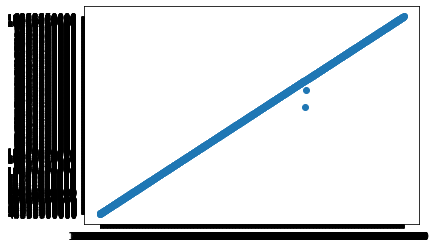

In [63]:
plt.scatter(data.volume,data.market_cap)
plt.show()


# Multiple Linear Regression


In [51]:
x=data[["volume",'close']]    #y = a + b1x1 + b2x2 
y=data.market_cap
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.4)

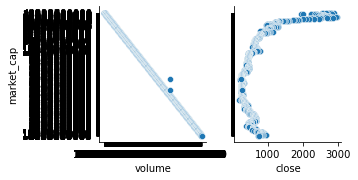

In [64]:
sns.pairplot(data,x_vars=["volume",'close'],y_vars=['market_cap'],diag_kind=None);

In [53]:
model=LinearRegression()

In [54]:
model.fit(x_train,y_train)

LinearRegression()

In [55]:
y_predict=model.predict(x_test)
y_predict

array([1.21158159e+10, 6.18139651e+09, 3.71203559e+09, 2.85055627e+10,
       9.78636726e+09, 3.04585641e+09, 4.08112352e+09, 6.08553879e+09,
       1.01693459e+10, 3.67622413e+09, 9.72258691e+09, 1.05074245e+10,
       6.07367581e+09, 4.55880507e+09, 3.19355636e+09, 3.23603306e+09,
       1.00503715e+10, 9.73157401e+09, 1.81356012e+10, 9.04069839e+09,
       6.54103989e+09, 8.56322624e+09, 6.10034541e+09, 3.62561491e+09,
       6.26891283e+09, 3.14683283e+09, 8.61866958e+09, 1.01317524e+10,
       9.04484426e+09, 9.91363973e+09, 2.98790257e+09, 6.05330443e+09,
       3.05627494e+09, 3.26149711e+09, 6.17134309e+09, 5.37379802e+09,
       5.33604853e+09, 3.01646603e+09, 1.60048789e+10, 6.59947037e+09,
       8.66515542e+09, 6.39427654e+09, 6.05404962e+09, 1.06686511e+10,
       2.88459719e+09, 1.28062179e+10, 1.96462566e+10, 4.16250478e+10,
       9.16682447e+09, 7.39048902e+09, 1.02276338e+10, 3.95435374e+09,
       3.04301584e+09, 5.13649216e+09, 6.62422358e+09, 5.29264409e+09,
      

In [56]:
y_test

223    12717600000
475     6520870000
653     3870490000
78     29405100000
373    10263700000
          ...     
952     4376890000
23     41417700000
34     40677900000
757     3741670000
890     3390510000
Name: market_cap, Length: 526, dtype: object

In [57]:
model.intercept_

-603190361.6458797

In [58]:
model.coef_

array([1.79542484e+00, 1.56579379e+07])